## How to load a dataset with PyTorch - FashionMNIST dataset

In [1]:
import torch
import torchvision #datasets, architectures, ...
import torchvision.transforms as transforms #interface with acess to transformations

In [2]:
#1) get Fashion MNIST data
#2) transform it to pytorch tensors
#3) load - put data into an easy accessible objet (dataset, dataloader)

In [10]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST'
    , train = True #we want data for the trainingdata
    , download = True #tells whether to download when not present
    , transform = transforms.Compose([
        transforms.ToTensor() #performed on dataset elements, transformed to Tensors
    ])
)
train_set

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data/FashionMNIST
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [49]:
#Data Loader: we can use this loader for tasks, that are hard to implement by hand: batch-size, threadmanagement,
# shuffle capabilities, ...
# also gives querying capabilities

train_load = torch.utils.data.DataLoader(
    train_set
    , batch_size = 10 #default size is 1
)

In [50]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth = 120) #setting for pytorch console output

In [51]:
#How many images do we have?

len(train_set)

60000

In [52]:
train_set.targets #earlier versions: train_labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [53]:
train_set.targets.bincount() #frequency of targets inside the tensor = balanced / unbalanced dataset

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [54]:
#Access an individal element of the training set
sample = next(iter(train_set)) #or train_set[0]
len(sample) 

2

In [55]:
type(sample) #image, label pairs

tuple

In [56]:
image, label = sample #"sequence / list unpacking" = accessing each item in this tuple

In [57]:
#Shape of the image
image.shape #grayscale, 28x28

torch.Size([1, 28, 28])

label: 9


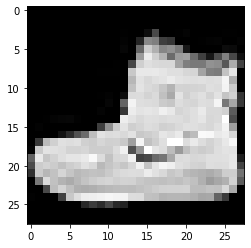

In [58]:
plt.imshow(image.squeeze(), cmap = "gray") #.squeeze() squeezes the color channel away,since it is gray anyway
print("label:", label)

In [59]:
#Working with a batch of img
batch = next(iter(train_load))

In [60]:
len(batch)

2

In [61]:
type(batch)

list

In [62]:
images, labels = batch

In [63]:
images.shape #10 for batch size, 1 for colorscale, 28x28

torch.Size([10, 1, 28, 28])

In [64]:
labels.shape #10 labels

torch.Size([10])

lablels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


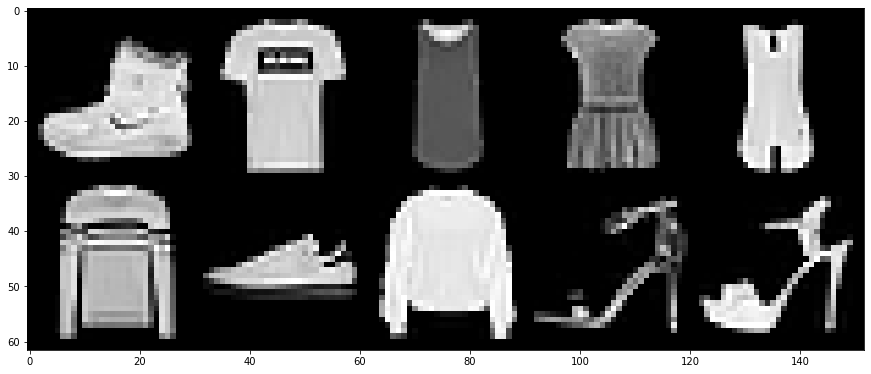

In [72]:
#Visualizing the whole batch at once, using a make_grid function ()
grid = torchvision.utils.make_grid(images, nrow=5)

plt.figure(figsize = (15, 15))
plt.imshow(np.transpose(grid, (1, 2, 0)))

print("lablels:", labels)

The dataloader will directly be used in the training loop